# Read phytoplankton data and add functional group info

In [1]:
library(tidyverse, warn.conflicts = FALSE)
library(cowplot, warn.conflicts = FALSE)
library(scales, warn.conflicts = FALSE)

# library to read matlab data formats into R
library(reshape2)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘lubridate’


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
library(worrms)

In [3]:
ds <- read.csv("../DATA/Phytoplankton_newest_full.csv")

ds$Datetime_UTC = parse_date_time(ds$Datetime_UTC, orders = "%Y-%m-%d H:M:S")
ds$Datetime_local = parse_date_time(ds$Datetime_local, orders = "%Y-%m-%d H:M:S")

ds$date = ds$Datetime_UTC

In [4]:
str(ds[ds$AphiaID<1,])

'data.frame':	1172 obs. of  28 variables:
 $ unlimited              : int  172 202 470 500 767 797 1064 1094 1362 1392 ...
 $ Cruise                 : int  1 1 2 2 3 3 4 4 5 5 ...
 $ Cruise_ID_2            : chr  "CAR-001" "CAR-001" "CAR-002" "CAR-002" ...
 $ Leg                    : int  2 2 1 1 1 1 1 1 1 1 ...
 $ Cast                   : int  2 2 2 2 3 3 4 4 4 4 ...
 $ Day_local              : int  8 8 13 13 12 12 13 13 13 13 ...
 $ Month_local            : int  11 11 12 12 1 1 2 2 3 3 ...
 $ Year_local             : int  1995 1995 1995 1995 1996 1996 1996 1996 1996 1996 ...
 $ Latitude               : num  10.5 10.5 10.5 10.5 10.5 ...
 $ Longitude              : num  -64.7 -64.7 -64.7 -64.7 -64.7 ...
 $ Time_start_local       : chr  "03:36" "03:36" "04:11" "04:11" ...
 $ Time_end_local         : chr  "03:54" "03:54" "04:50" "04:50" ...
 $ Datetime_local         : POSIXct, format: "1995-11-08 03:36:00" "1995-11-08 03:36:00" ...
 $ Datetime_UTC           : POSIXct, format: "1995-11-08

In [5]:
str(ds)

'data.frame':	96841 obs. of  28 variables:
 $ unlimited              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Cruise                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Cruise_ID_2            : chr  "CAR-001" "CAR-001" "CAR-001" "CAR-001" ...
 $ Leg                    : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Cast                   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Day_local              : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Month_local            : int  11 11 11 11 11 11 11 11 11 11 ...
 $ Year_local             : int  1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 ...
 $ Latitude               : num  10.5 10.5 10.5 10.5 10.5 ...
 $ Longitude              : num  -64.7 -64.7 -64.7 -64.7 -64.7 ...
 $ Time_start_local       : chr  "03:36" "03:36" "03:36" "03:36" ...
 $ Time_end_local         : chr  "03:54" "03:54" "03:54" "03:54" ...
 $ Datetime_local         : POSIXct, format: "1995-11-08 03:36:00" "1995-11-08 03:36:00" ...
 $ Datetime_UTC           : POSIXct, format: "1995-11-08 07:36:00" "1995-11-08 07

## now read Functional Group annotated csv

In [6]:
annotated_fg <- read.csv("../annotatedDATA/worms_dat_annotated_OLDFUNCGROUP.csv", sep=";", dec=',', stringsAsFactor=FALSE)
#annotated_fg = annotated_fg[complete.cases(annotated_fg),]

# trim dataframe to relevant columns
AphiaID2FG <- data.frame("AphiaID" = annotated_fg$AphiaID, 
                         "FuncGroup" = as.character(annotated_fg$functionalgroup_old), 
                         stringsAsFactors=FALSE)

In [7]:
#annotated_fg

## and merge with ds by AphiaID

In [8]:
ds_FG <- merge(ds, AphiaID2FG, all=TRUE)

In [9]:
ds_FG$FuncGroup[ds_FG$ScientificName_accepted == "nanoflagellates"]   <- "NANOFLAGELLATES"
ds_FG$FuncGroup[ds_FG$ScientificName_accepted == "palmelloid colony"] <- "PALMELLOIDCOLONY"

In [10]:
#head(ds_FG)

In [11]:
# ds_FG[ds_FG$AphiaID>1000,]$ScientificName_accepted

# Now let's plot some raw counts:

In [12]:
options(repr.plot.width=15, repr.plot.height=7)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


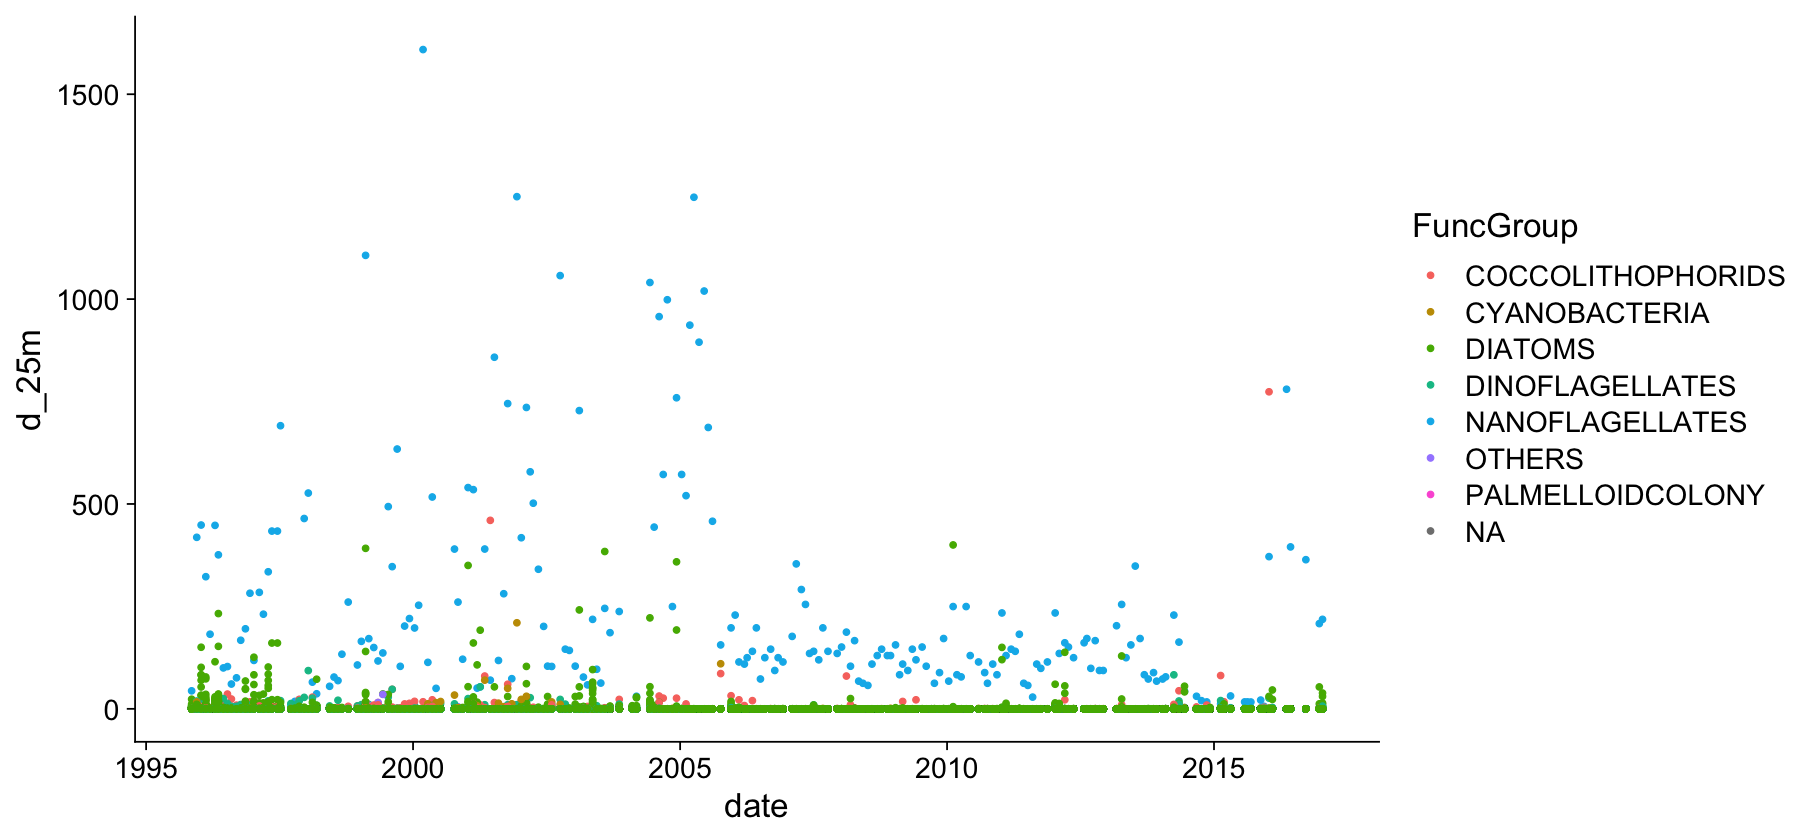

In [13]:
ggplot(data=ds_FG, aes(x=date, y=d_25m, color=FuncGroup)) + geom_point() + theme_cowplot(font_size=20)

In [14]:
blob <- rbind(data.frame(val=ds_FG$d_1m, depth=1, date=ds_FG$date, AphiaID=ds_FG$AphiaID , FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_7m, depth=7, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_15m, depth=15, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_25m, depth=25, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_55m, depth=55, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_75m, depth=75, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_100m, depth=100, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup))

In [23]:
#blob

In [24]:
func_group_key = unique(blob[,c('AphiaID', 'FuncGroup')])

In [25]:
# Function to read specific functionial type from dataset

prepdataframe <- function(funcgroup='', datasource='blob'){
    if(datasource=='blob'){
    DF <- blob
    #print(names(DF))
    
    DF_FG <- DF %>%
     filter(FuncGroup == funcgroup)
    
    VarDF <- DF_FG %>%
      select(date, val, depth) %>%
      gather(key='key',value = "value", -date, -depth)
    #head(VarDF)
    }
    
    return(VarDF)
}

In [26]:
# Interpolate
interpolateDF <- function(DF,func='linear'){
    zz <- seq(0, 100, 1)
    
    if(func=='linear'){
        IntDF <- DF %>%
            group_by(date) %>%
            filter(sum(!is.na(value))>1) %>%
            do(data.frame(value_int = with(.,approx(depth, value, zz)), depth = zz)) 
        
        IntDF <- IntDF %>% 
              rename(
                value_int = value_int.y
                )
        IntDF$value_int.x <- NULL
        }
    
    return(IntDF)
}

In [27]:
#diatoms <- prepdataframe("DIATOMS")

In [28]:

getfuncgroupint <- function(funcgroup){
    
        fg_dat <- prepdataframe(funcgroup)

        fg_dat_int <- interpolateDF(fg_dat)

        fg_dat_sum <- fg_dat_int %>%
            group_by(date) %>%
            filter(depth<101) %>%
            filter(sum(is.na(value_int))<20) %>%
            summarize(#value_sum = sum(value_int, na.rm=TRUE), 
                      value_mean = mean(value_int, na.rm=TRUE),
                      #value_intgrtd = value_mean * 100,
                      #NAs = sum(is.na(value_int)), .groups="keep"
            )   

    return(fg_dat_sum)
}

In [29]:
defaultW <- getOption("warn")
options(warn = -1)


diatoms_sum <- getfuncgroupint("DIATOMS")

#dino_sum <- getfuncgroupint("DINOFLAGELLATES")

#cyano_sum <- getfuncgroupint("CYANOBACTERIA")

#nano_sum <- getfuncgroupint("NANOFLAGELLATES")

In [30]:
# check magnitude, use the same values as legacy papaer

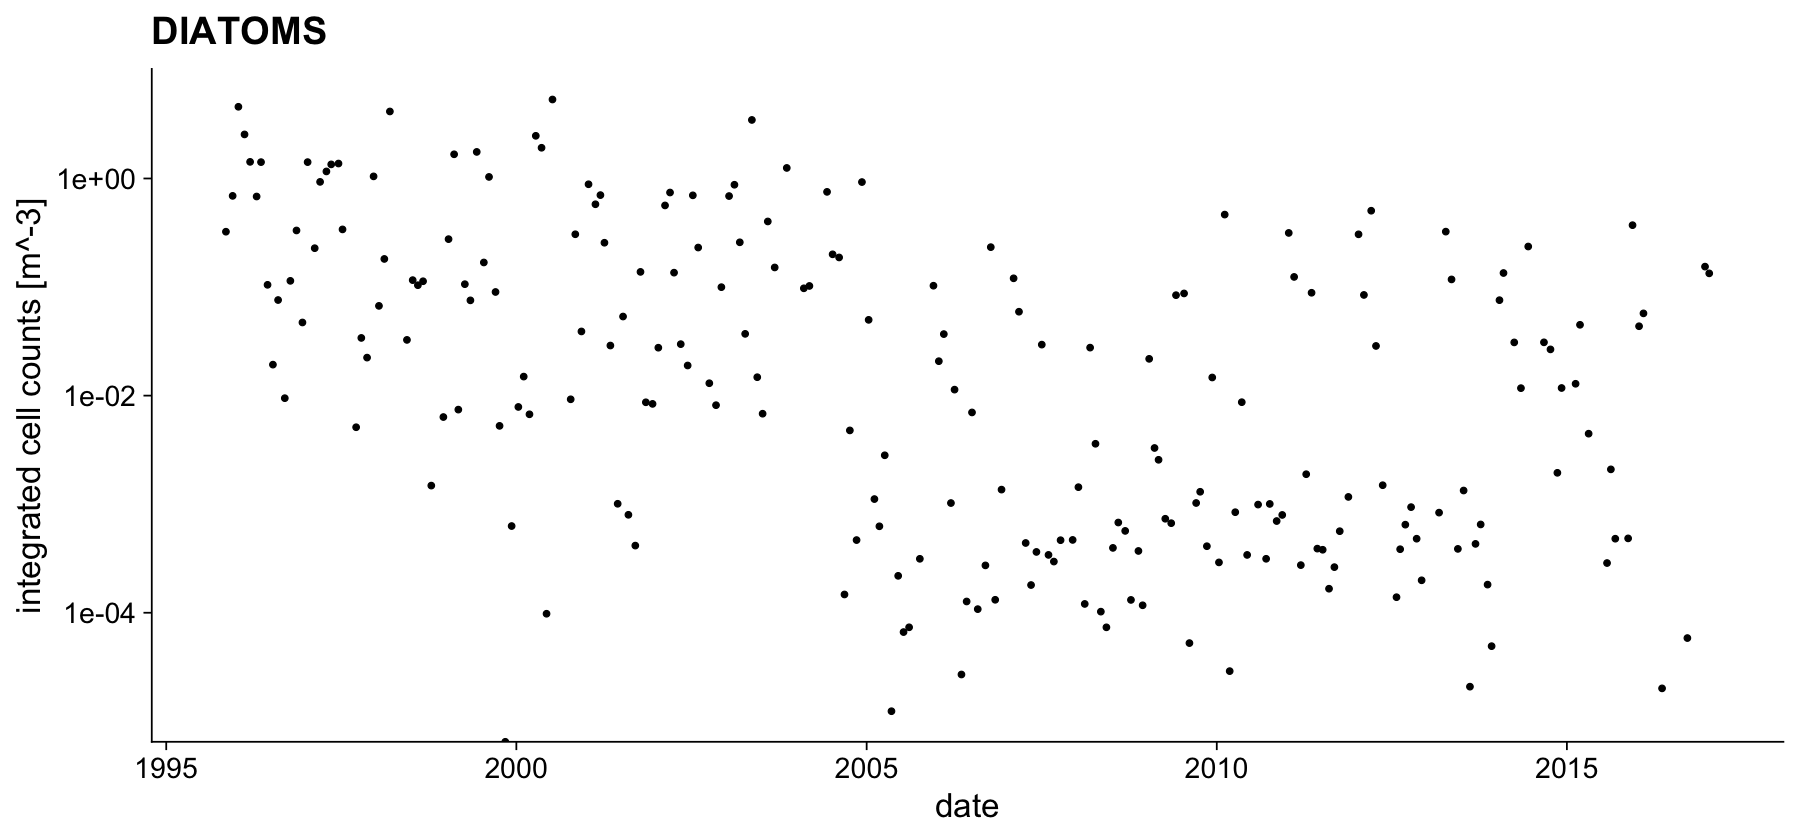

In [31]:
ggplot(data=diatoms_sum, aes(x=date, y=value_mean)) + geom_point() + theme_cowplot(font_size=20)+
 ggtitle("DIATOMS") + ylab("integrated cell counts [m^-3]") + scale_y_log10()

In [32]:
#diatoms_sum

In [33]:
FuncGroups = unique(AphiaID2FG$FuncGroup)

fgnum = length(FuncGroups)

# Create Dataframe of Integrated Counts per Func Group

In [34]:
fg_intmean_dat <- getfuncgroupint(FuncGroups[1])
names(fg_intmean_dat)[2] <- FuncGroups[1]

#print(head(fg_intmean_dat))
#print(names(fg_intmean_dat))

for (i in 2:fgnum){
    print(paste(i, "FuncGroup: ", FuncGroups[i]))
    fg_intmean_dat <- left_join(fg_intmean_dat, getfuncgroupint(FuncGroups[i]), by = "date")
    #print(head(fg_intmean_dat))
    #print(names(fg_intmean_dat))
    names(fg_intmean_dat)[1+i] <- FuncGroups[i]
}

[1] "2 FuncGroup:  DIATOMS"
[1] "3 FuncGroup:  DINOFLAGELLATES"
[1] "4 FuncGroup:  CYANOBACTERIA"
[1] "5 FuncGroup:  OTHERS"
[1] "6 FuncGroup:  NANOFLAGELLATES"


In [35]:
#write.csv(fg_intmean_dat, "IntegratedPhytoplanktonFuncGroupCounts.csv")

# GET PRESENCE PER CRUISE PER APHIA ID

In [36]:
# function to read specific aphia id identified from dataset

prepdataframe_APHIA <- function(aphia_id='', datasource='blob'){
    if(datasource=='blob'){
    DF <- blob
    #print(names(DF))
    
    DF_FG <- DF %>%
     filter(AphiaID == aphia_id)
    
    VarDF <- DF_FG %>%
      select(date, val, depth) %>%
      gather(key='key',value = "value", -date, -depth)
    #head(VarDF)
    }
    
    return(VarDF)
}

In [37]:
head(prepdataframe_APHIA(17657))

,date,depth,key,value
,<dttm>,<dbl>,<chr>,<dbl>
1,2007-05-08 09:06:00,1,val,0
2,2006-10-10 09:13:00,1,val,0
3,2012-11-08 09:19:00,1,val,0
4,2004-02-08 08:29:00,1,val,0
5,2011-07-07 08:57:00,1,val,0
6,2012-04-10 09:11:00,1,val,0


In [40]:
head(getAPHIAint(17657))

date,value_sum
<dttm>,<dbl>
1999-07-15 09:36:00,0.00
1999-08-11 09:25:00,1.26
2000-07-07 10:03:00,0.00
2001-02-16 10:35:00,0.00
2001-03-14 10:28:00,0.00
2001-04-04 09:45:00,0.00


In [41]:
# get interpolated presences for specific AphiaID
getAPHIAint <- function(aphia_id){
    
        ap_dat <- prepdataframe_APHIA(aphia_id)

        ap_dat_int <- interpolateDF(ap_dat)

        ap_dat_sum <- ap_dat_int %>%
            group_by(date) %>%
            filter(depth<101) %>%
            filter(sum(is.na(value_int))<20) %>%
            summarize(value_sum = sum(value_int, na.rm=TRUE), 
                      #value_mean = mean(value_int, na.rm=TRUE),
                      #value_intgrtd = value_mean * 100,
                      #NAs = sum(is.na(value_int)), .groups="keep"
            )   

    return(ap_dat_sum)
}

In [42]:
AphiaIDs <- unique(blob[blob$AphiaID>1,]$AphiaID)

apnum = length(AphiaIDs)

In [43]:
ap_intmean_dat <- getAPHIAint(AphiaIDs[1])
names(ap_intmean_dat)[2] <- AphiaIDs[1]

#print(head(fg_intmean_dat))
#print(names(fg_intmean_dat))

for (i in 2:apnum){
    #print(paste(i, "AphiaID: ", AphiaIDs[i]))
    ap_intmean_dat <- left_join(ap_intmean_dat, getAPHIAint(AphiaIDs[i]), by = "date")
    #print(head(fg_intmean_dat))
    #print(names(fg_intmean_dat))
    names(ap_intmean_dat)[1+i] <- AphiaIDs[i]
}

In [44]:
#ap_intmean_dat

In [45]:
spec_ric_dat <- ap_intmean_dat %>%
    pivot_longer(!date, names_to='AphiaID', values_to='values_sum' ) %>%
    group_by(date) %>%
    mutate(presence = values_sum > 0 & !is.na(values_sum)) %>%
    summarize(species_richness=sum(presence))

In [46]:
#write.csv(spec_ric_dat, "IntegratedPhytoplanktonSpeciesRichnessEstimate.csv")

In [48]:
#spec_ric_dat

# Try to get richness per func group

In [64]:
for (i in 100:101){
    a = func_group_key[func_group_key$AphiaID==Aphia_dailysum_dat$AphiaID[i],]$FuncGroup
    print(a)
    }

[1] "DINOFLAGELLATES"
[1] "DINOFLAGELLATES"


In [73]:
Aphia_dailysum_dat <- ap_intmean_dat %>%
    pivot_longer(!date, names_to='AphiaID', values_to='values_sum' ) %>%
    group_by(date) #%>%
    #mutate(across(func_group_key$FuncGroup==AphiaID ))#func_group_key[func_group_key$AphiaID==AphiaID,]$FuncGroup) #%>%
    #summarize(species_richness=sum(presence))

In [83]:
head(Aphia_dailysum_dat)

date,AphiaID,values_sum
<dttm>,<chr>,<dbl>
1995-11-08 07:36:00,801,0
1995-11-08 07:36:00,17657,NA
1995-11-08 07:36:00,106283,NA
1995-11-08 07:36:00,106285,NA
1995-11-08 07:36:00,106289,NA
1995-11-08 07:36:00,106314,NA


In [85]:
FuncAphia_dat <- Aphia_dailysum_dat %>%
    group_by(AphiaID) %>%
    mutate(FuncGroup = func_group_key[func_group_key$AphiaID==AphiaID,]$FuncGroup) %>%
    ungroup() 

In [91]:
FuncGroup_SpeciesRichness <- FuncAphia_dat %>%
    group_by(date, FuncGroup) %>%
    mutate(presence = values_sum > 0 & !is.na(values_sum)) %>%
    summarize(species_richness=sum(presence)) %>%
    pivot_wider(names_from = FuncGroup, values_from = species_richness)

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.



In [92]:
write.csv(FuncGroup_SpeciesRichness,"IntegratedPhytoplanktonFuncGroupSpeciesRichness.csv")